In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 119us/step - loss: 2.3043 - accuracy: 0.1374 - val_loss: 2.2383 - val_accuracy: 0.1795
Epoch 2/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.2049 - accuracy: 0.2002 - val_loss: 2.1679 - val_accuracy: 0.2306
Epoch 3/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.1420 - accuracy: 0.2424 - val_loss: 2.1118 - val_accuracy: 0.2651
Epoch 4/500
50000/50000 [==============================] - 6s 115us/step - loss: 2.0929 - accuracy: 0.2673 - val_loss: 2.0685 - val_accuracy: 0.2824
Epoch 5/500
50000/50000 [==============================] - 6s 116us/step - loss: 2.0549 - accuracy: 0.2819 - val_loss: 2.0354 - val_accuracy: 0.2961
Epoch 6/500
50000/50000 [==============================] - 6s 113us/step - loss: 2.0248 - accuracy: 0.2951 - val_loss: 2.0078 - val_accuracy: 0.3048
Epoch 7/500
50000/50000 [==============================]

50000/50000 [==============================] - 6s 115us/step - loss: 1.6659 - accuracy: 0.4173 - val_loss: 1.6709 - val_accuracy: 0.4211
Epoch 56/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.6628 - accuracy: 0.4179 - val_loss: 1.6656 - val_accuracy: 0.4226
Epoch 57/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.6592 - accuracy: 0.4209 - val_loss: 1.6627 - val_accuracy: 0.4206
Epoch 58/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.6562 - accuracy: 0.4207 - val_loss: 1.6606 - val_accuracy: 0.4226
Epoch 59/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.6527 - accuracy: 0.4236 - val_loss: 1.6570 - val_accuracy: 0.4230
Epoch 60/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.6499 - accuracy: 0.4234 - val_loss: 1.6543 - val_accuracy: 0.4238
Epoch 61/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.6468 - accuracy: 0.4255 - val

Epoch 110/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.5276 - accuracy: 0.4669 - val_loss: 1.5543 - val_accuracy: 0.4562
Epoch 111/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.5255 - accuracy: 0.4670 - val_loss: 1.5471 - val_accuracy: 0.4581
Epoch 112/500
50000/50000 [==============================] - 5s 108us/step - loss: 1.5236 - accuracy: 0.4676 - val_loss: 1.5474 - val_accuracy: 0.4529
Epoch 113/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.5217 - accuracy: 0.4688 - val_loss: 1.5433 - val_accuracy: 0.4600
Epoch 114/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.5199 - accuracy: 0.4686 - val_loss: 1.5442 - val_accuracy: 0.4586
Epoch 115/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.5181 - accuracy: 0.4709 - val_loss: 1.5456 - val_accuracy: 0.4522
Epoch 116/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.5162 - accur

50000/50000 [==============================] - 5s 98us/step - loss: 1.4353 - accuracy: 0.4980 - val_loss: 1.4821 - val_accuracy: 0.4781
Epoch 165/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.4339 - accuracy: 0.4993 - val_loss: 1.4839 - val_accuracy: 0.4762
Epoch 166/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.4325 - accuracy: 0.4996 - val_loss: 1.4845 - val_accuracy: 0.4764
Epoch 167/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.4309 - accuracy: 0.5007 - val_loss: 1.4883 - val_accuracy: 0.4732
Epoch 168/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.4295 - accuracy: 0.4991 - val_loss: 1.4804 - val_accuracy: 0.4766
Epoch 169/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.4281 - accuracy: 0.5014 - val_loss: 1.4863 - val_accuracy: 0.4723
Epoch 170/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.4266 - accuracy: 0.5021 - val_

50000/50000 [==============================] - 5s 98us/step - loss: 1.3597 - accuracy: 0.5251 - val_loss: 1.4383 - val_accuracy: 0.4931
Epoch 219/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.3581 - accuracy: 0.5259 - val_loss: 1.4334 - val_accuracy: 0.4957
Epoch 220/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.3571 - accuracy: 0.5261 - val_loss: 1.4388 - val_accuracy: 0.4917
Epoch 221/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.3563 - accuracy: 0.5267 - val_loss: 1.4393 - val_accuracy: 0.4898
Epoch 222/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.3542 - accuracy: 0.5269 - val_loss: 1.4556 - val_accuracy: 0.4880
Epoch 223/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.3533 - accuracy: 0.5281 - val_loss: 1.4318 - val_accuracy: 0.4961
Epoch 224/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.3517 - accuracy: 0.5288 - val

50000/50000 [==============================] - 5s 98us/step - loss: 1.2924 - accuracy: 0.5495 - val_loss: 1.3993 - val_accuracy: 0.5059
Epoch 273/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.2913 - accuracy: 0.5494 - val_loss: 1.3981 - val_accuracy: 0.5030
Epoch 274/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.2906 - accuracy: 0.5491 - val_loss: 1.4090 - val_accuracy: 0.5005
Epoch 275/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.2890 - accuracy: 0.5490 - val_loss: 1.4120 - val_accuracy: 0.5001
Epoch 276/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.2878 - accuracy: 0.5513 - val_loss: 1.4158 - val_accuracy: 0.5010
Epoch 277/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.2868 - accuracy: 0.5519 - val_loss: 1.3937 - val_accuracy: 0.5056
Epoch 278/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.2858 - accuracy: 0.5504 - val_

50000/50000 [==============================] - 5s 100us/step - loss: 1.2309 - accuracy: 0.5723 - val_loss: 1.3699 - val_accuracy: 0.5138
Epoch 327/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.2295 - accuracy: 0.5714 - val_loss: 1.3764 - val_accuracy: 0.5090
Epoch 328/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.2286 - accuracy: 0.5721 - val_loss: 1.3941 - val_accuracy: 0.5035
Epoch 329/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.2265 - accuracy: 0.5723 - val_loss: 1.3775 - val_accuracy: 0.5122
Epoch 330/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.2259 - accuracy: 0.5737 - val_loss: 1.3759 - val_accuracy: 0.5128
Epoch 331/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.2250 - accuracy: 0.5746 - val_loss: 1.3779 - val_accuracy: 0.5112
Epoch 332/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.2239 - accuracy: 0.5757 - va

50000/50000 [==============================] - 5s 98us/step - loss: 1.1719 - accuracy: 0.5928 - val_loss: 1.3496 - val_accuracy: 0.5223
Epoch 381/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.1698 - accuracy: 0.5938 - val_loss: 1.3547 - val_accuracy: 0.5199
Epoch 382/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.1692 - accuracy: 0.5945 - val_loss: 1.3587 - val_accuracy: 0.5179
Epoch 383/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.1685 - accuracy: 0.5946 - val_loss: 1.3676 - val_accuracy: 0.5154
Epoch 384/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.1670 - accuracy: 0.5944 - val_loss: 1.4054 - val_accuracy: 0.5023
Epoch 385/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.1673 - accuracy: 0.5951 - val_loss: 1.3860 - val_accuracy: 0.5128
Epoch 386/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.1655 - accuracy: 0.5965 - val

50000/50000 [==============================] - 5s 100us/step - loss: 1.1145 - accuracy: 0.6116 - val_loss: 1.3621 - val_accuracy: 0.5196
Epoch 435/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.1141 - accuracy: 0.6121 - val_loss: 1.3662 - val_accuracy: 0.5179
Epoch 436/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.1120 - accuracy: 0.6138 - val_loss: 1.3426 - val_accuracy: 0.5254
Epoch 437/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.1119 - accuracy: 0.6148 - val_loss: 1.3716 - val_accuracy: 0.5142
Epoch 438/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.1103 - accuracy: 0.6152 - val_loss: 1.3649 - val_accuracy: 0.5166
Epoch 439/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.1089 - accuracy: 0.6138 - val_loss: 1.3637 - val_accuracy: 0.5181
Epoch 440/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.1091 - accuracy: 0.6141 - v

50000/50000 [==============================] - 5s 98us/step - loss: 1.0613 - accuracy: 0.6294 - val_loss: 1.3512 - val_accuracy: 0.5254
Epoch 489/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.0563 - accuracy: 0.6336 - val_loss: 1.3708 - val_accuracy: 0.5152
Epoch 490/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.0575 - accuracy: 0.6313 - val_loss: 1.3418 - val_accuracy: 0.5263
Epoch 491/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.0541 - accuracy: 0.6343 - val_loss: 1.3528 - val_accuracy: 0.5228
Epoch 492/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.0547 - accuracy: 0.6334 - val_loss: 1.3427 - val_accuracy: 0.5302
Epoch 493/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.0548 - accuracy: 0.6334 - val_loss: 1.3555 - val_accuracy: 0.5276
Epoch 494/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.0521 - accuracy: 0.6335 - va

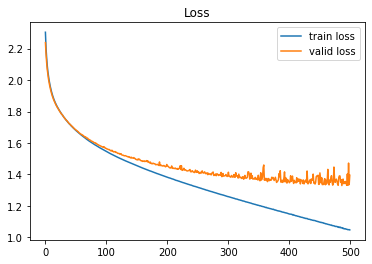

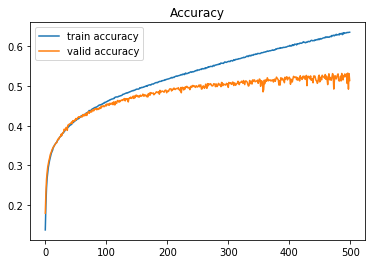

In [9]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()